<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/analise_pib_mercosul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Coleta dos dados dos pib's do Brasil, Argentina, Paraguai, Uruguai, Peru, Bolívia e Chile
#Utilizando os dados do Banco Mundial
#Indicador do pib: 'NY.GDP.MKTP.CD'
import requests
import pandas as pd

# Definindo os países
countries = ['BRA', 'ARG', 'PRY', 'URY', 'PER', 'BOL', 'CHL']
indicator = 'NY.GDP.MKTP.CD'
base_url = 'https://api.worldbank.org/v2/country/{}/indicator/{}?format=json'

# Função para obter dados de um país
def get_country_data(country_code, indicator):
    url = base_url.format(country_code, indicator)
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()[1]
        return data
    else:
        print(f"Erro ao obter dados para {country_code}")
        return None

# Coletando dados para todos os países
data_frames = []
for country in countries:
    country_data = get_country_data(country, indicator)
    if country_data:
        df = pd.DataFrame(country_data)
        df['country'] = country
        data_frames.append(df)

# Concatenando os dados em um único DataFrame
gdp_data = pd.concat(data_frames, ignore_index=True)

# Selecionando as colunas relevantes
gdp_data = gdp_data[['country', 'date', 'value']]

# Tratando os dados: convertendo a coluna 'date' para datetime e a coluna 'value' para float
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'], errors='coerce')

# Exibindo os dados tratados
print(gdp_data.head())

# Opcional: salvar os dados em um arquivo CSV para visualização
gdp_data.to_excel('gdp_data.xlsx', index=False)

  country       date         value
0     BRA 2023-01-01  2.173666e+12
1     BRA 2022-01-01  1.951924e+12
2     BRA 2021-01-01  1.670647e+12
3     BRA 2020-01-01  1.476107e+12
4     BRA 2019-01-01  1.873288e+12


In [ ]:
# Apresentar os 5 primeiros dados de data_frames
for df in data_frames[:5]:
    print(df.head())

                                           indicator country countryiso3code  \
0  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...     BRA             BRA   
1  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...     BRA             BRA   
2  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...     BRA             BRA   
3  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...     BRA             BRA   
4  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...     BRA             BRA   

   date         value unit obs_status  decimal  
0  2023  2.173666e+12                        0  
1  2022  1.951924e+12                        0  
2  2021  1.670647e+12                        0  
3  2020  1.476107e+12                        0  
4  2019  1.873288e+12                        0  
                                           indicator country countryiso3code  \
0  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...     ARG             ARG   
1  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...     ARG     

In [ ]:
# Organizando os dados tendo a data como index e os pib's dos países nas colunas.
gdp_pivoted = gdp_data.pivot_table(values='value', index='date', columns='country')
print(gdp_pivoted.head())

country     ARG           BOL  BRA           CHL  PER           PRY  \
date                                                                  
1974-01-01  NaN  2.101300e+09  NaN  1.620969e+10  NaN  1.333475e+09   
1975-01-01  NaN  2.405900e+09  NaN  7.621570e+09  NaN  1.511421e+09   
1976-01-01  NaN  2.733350e+09  NaN  1.033862e+10  NaN  1.698960e+09   
1977-01-01  NaN  3.229050e+09  NaN  1.396560e+10  NaN  2.092159e+09   
1978-01-01  NaN  3.760100e+09  NaN  1.599204e+10  NaN  2.559857e+09   

country              URY  
date                      
1974-01-01  4.091439e+09  
1975-01-01  3.538014e+09  
1976-01-01  3.667717e+09  
1977-01-01  4.114375e+09  
1978-01-01  4.910526e+09  


In [ ]:
# Tratamento de dados faltantes: tratados com dados anteriores ou posteriores.

# Filling missing values with previous values
gdp_pivoted.fillna(method='pad', inplace=True)

# Filling missing values with subsequent values
gdp_pivoted.fillna(method='bfill', inplace=True)

print(gdp_pivoted.tail())


country              ARG           BOL           BRA           CHL  \
date                                                                 
2019-01-01  4.477547e+11  4.089532e+10  1.873288e+12  2.782851e+11   
2020-01-01  3.857405e+11  3.662984e+10  1.476107e+12  2.540422e+11   
2021-01-01  4.879026e+11  4.040611e+10  1.670647e+12  3.155150e+11   
2022-01-01  6.311334e+11  4.400828e+10  1.951924e+12  3.021165e+11   
2023-01-01  6.405914e+11  4.584983e+10  2.173666e+12  3.355333e+11   

country              PER           PRY           URY  
date                                                  
2019-01-01  2.283460e+11  3.792534e+10  6.222239e+10  
2020-01-01  2.014097e+11  3.543218e+10  5.366864e+10  
2021-01-01  2.263543e+11  3.995090e+10  6.076080e+10  
2022-01-01  2.464888e+11  4.195291e+10  7.016468e+10  
2023-01-01  2.676032e+11  4.295626e+10  7.724083e+10  


<ipython-input-6-bd3b069a90f8>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_pivoted.fillna(method='pad', inplace=True)
<ipython-input-6-bd3b069a90f8>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_pivoted.fillna(method='bfill', inplace=True)


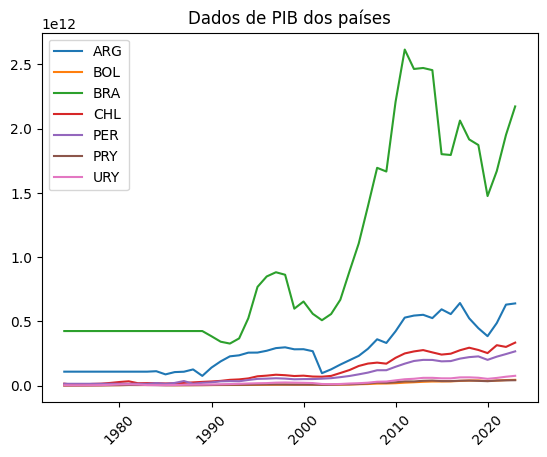

In [ ]:
# Gráfico temporal do pib bruto de cada pais
import matplotlib.pyplot as plt

# Plotando o gráfico temporal para cada país
for country in gdp_pivoted.columns:
  plt.plot(gdp_pivoted.index, gdp_pivoted[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título e legenda
plt.title("Dados de PIB dos países")
plt.legend()

# Mostrando o gráfico
plt.show()


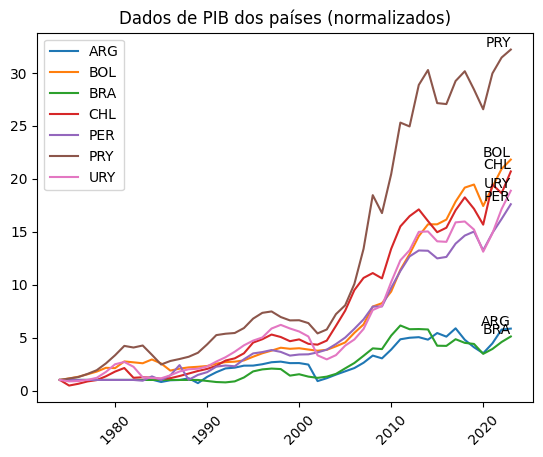

In [ ]:
# Gráfico normalizado base 1 com legenda lateral e nas linhas

# Gráfico normalizando na base 1.
import matplotlib.pyplot as plt

# Normalizando os dados na base 1
gdp_normalized = gdp_pivoted.div(gdp_pivoted.iloc[0])

# Plotando o gráfico temporal para cada país
for country in gdp_normalized.columns:
  plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

  # Adicionando a legenda do país na posição final da linha
  plt.text(gdp_normalized.index[-1], gdp_normalized[country].iloc[-1], country, ha='right', va='bottom')

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título e legenda
plt.title("Dados de PIB dos países (normalizados)")
plt.legend()

# Mostrando o gráfico
plt.show()


<ipython-input-9-57b96c5ca334>:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_per_capita_pivot = gdp_per_capita_pivot.fillna(method='ffill').fillna(method='bfill')


country              ARG          BOL           BRA           CHL  \
date                                                                
2019-01-01   9963.674162  3472.380831   8845.324149  14616.207251   
2020-01-01   8500.837939  3068.812555   6923.699912  13162.591352   
2021-01-01  10650.860460  3345.023002   7794.880979  16185.914771   
2022-01-01  13650.604629  3600.121635   9065.497334  15411.173954   
2023-01-01  13730.514709  3700.978338  10043.623922  17093.241971   

country             PER          PRY           URY  
date                                                
2019-01-01  6956.495749  5807.838794  18149.056291  
2020-01-01  6047.475464  5353.348065  15651.003378  
2021-01-01  6713.662054  5959.441794  17733.855164  
2022-01-01  7239.111311  6187.066030  20499.242224  
2023-01-01  7789.870975  6260.455191  22564.532462  


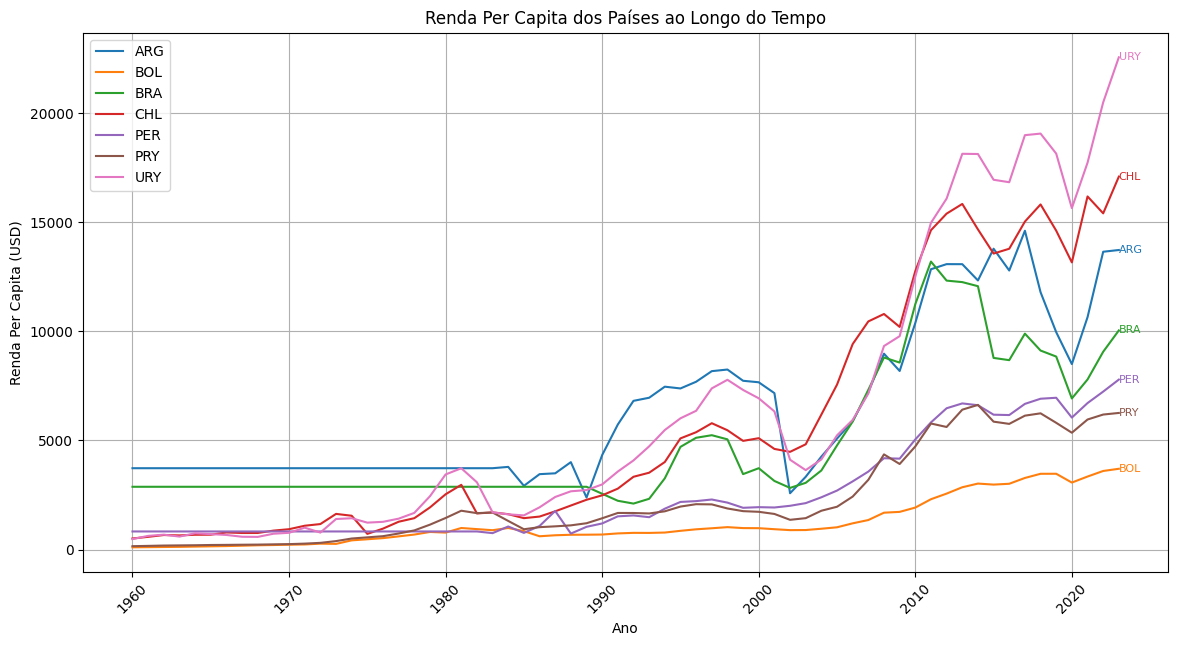

In [ ]:
# Evolução da renda per capita ao longo da série
# Coleta os dados do pib e população por meio da api
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Definindo os países
countries = ['BRA', 'ARG', 'PRY', 'URY', 'PER', 'BOL', 'CHL']
gdp_indicator = 'NY.GDP.MKTP.CD'
population_indicator = 'SP.POP.TOTL'
base_url = 'https://api.worldbank.org/v2/country/{}/indicator/{}?format=json&per_page=1000'

# Função para obter dados de um país e indicador
def get_country_data(country_code, indicator):
    url = base_url.format(country_code, indicator)
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()[1]
        return data
    else:
        print(f"Erro ao obter dados para {country_code} com indicador {indicator}")
        return None

# Coletando dados de PIB e população para todos os países
gdp_data_frames = []
population_data_frames = []
for country in countries:
    # Dados de PIB
    country_gdp_data = get_country_data(country, gdp_indicator)
    if country_gdp_data:
        df_gdp = pd.DataFrame(country_gdp_data)
        df_gdp['country'] = country
        gdp_data_frames.append(df_gdp)

    # Dados de População
    country_population_data = get_country_data(country, population_indicator)
    if country_population_data:
        df_population = pd.DataFrame(country_population_data)
        df_population['country'] = country
        population_data_frames.append(df_population)

# Concatenando os dados em um único DataFrame
gdp_data = pd.concat(gdp_data_frames, ignore_index=True)
population_data = pd.concat(population_data_frames, ignore_index=True)

# Selecionando as colunas relevantes e renomeando
gdp_data = gdp_data[['country', 'date', 'value']]
gdp_data.columns = ['country', 'date', 'gdp']
population_data = population_data[['country', 'date', 'value']]
population_data.columns = ['country', 'date', 'population']

# Convertendo a coluna 'date' para datetime
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
population_data['date'] = pd.to_datetime(population_data['date'])

# Mesclando os dados de PIB e população
merged_data = pd.merge(gdp_data, population_data, on=['country', 'date'])

# Calculando a renda per capita
merged_data['gdp_per_capita'] = merged_data['gdp'] / merged_data['population']

# Pivotando os dados para ter países como colunas e datas como índice
gdp_per_capita_pivot = merged_data.pivot(index='date', columns='country', values='gdp_per_capita')

# Preenchendo valores faltantes com preenchimento para frente
gdp_per_capita_pivot = gdp_per_capita_pivot.fillna(method='ffill').fillna(method='bfill')

# Exibindo os dados tratados
print(gdp_per_capita_pivot.tail())

# Plotando o gráfico temporal para cada país
plt.figure(figsize=(14, 7))
for country in gdp_per_capita_pivot.columns:
    plt.plot(gdp_per_capita_pivot.index, gdp_per_capita_pivot[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título
plt.title("Renda Per Capita dos Países ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Renda Per Capita (USD)")

# Adicionando a legenda manualmente no final de cada linha
for i, country in enumerate(gdp_per_capita_pivot.columns):
    plt.text(gdp_per_capita_pivot.index[-1], gdp_per_capita_pivot.iloc[-1, i], country,
             ha='left', va='center', fontsize=8, color=plt.gca().lines[i].get_color())

# Mostrando a grade no gráfico
plt.grid(True)

# Adicionando a legenda automática
plt.legend()

# Mostrando o gráfico
plt.show()


In [ ]:
merged_data

,country,date,gdp,population,gdp_per_capita
0,BRA,2023-01-01,NaN,NaN,NaN
1,BRA,2022-01-01,1.920096e+12,215313498.0,8917.674911
2,BRA,2021-01-01,1.649623e+12,214326223.0,7696.784830
3,BRA,2020-01-01,1.476107e+12,213196304.0,6923.699912
4,BRA,2019-01-01,1.873288e+12,211782878.0,8845.324149
...,...,...,...,...,...
443,CHL,1964-01-01,5.964196e+09,8825046.0,675.826044
444,CHL,1963-01-01,5.591307e+09,8656006.0,645.945373
445,CHL,1962-01-01,5.631285e+09,8486120.0,663.587770
446,CHL,1961-01-01,4.829238e+09,8313535.0,580.888647
